In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

def plot_data(data, labels):
    """
    Plot the data using matplotlib.
    """
    plt.figure()
    for d, label in zip(data, labels):
        plt.plot(d, label=label)
        plt.legend()

def plot_combined_data(data_gripper, data_target, labels, upper_bound=None, lower_bound=None):
    """
    Plot gripper and target data on the same plot with the same color for each direction.
    Gripper data will be solid lines, target data will be dashed lines.
    """
    plt.figure()  # You can adjust the size if you want

    colors = ['b', 'g', 'r']  # blue, green, red for x, y, z respectively
    line_styles = ['-', '--']  # solid for gripper, dashed for target

    for i, (d_gripper, d_target, label) in enumerate(zip(data_gripper, data_target, labels)):
        print(i)
        color = colors[i % len(colors)]
        plt.plot(d_gripper, line_styles[0], color=color, label=f'Gripper {label}')
        plt.plot(d_target, line_styles[1], color=color, label=f'Target {label}')
        if upper_bound is not None and lower_bound is not None:
            plt.ylim(lower_bound, upper_bound)
        plt.legend()

def is_array_column(col):
    return isinstance(col.iloc[0], str) and col.iloc[0].startswith('[') and col.iloc[0].endswith(']') 

# Function to convert string representation of arrays to actual arrays
def convert_to_array(col):
    return col.apply(lambda x: [float(num) for num in x.strip('[]').split()])

file_path = 'evaluation/output_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Iterate over the columns and apply the conversion function to each element
tuple_columns = ['position_action','angle_action','gripper_position','gripper_angle','gripper_velocity','gripper_angular_velocity','target_position','target_angle','target_velocity',
                 'target_angular_velocity','closest_point','contact_force','rewards','finger1_min_dists','finger2_min_dists','finger3_min_dists',
                 'num_contact_points','fingertip_num_contact_points','accumulated_contact_force','totalLateralFrictionForce',
]
plot_data(zip(data["position_action"]), ["x action", "y action", "z action"])
plot_data(zip(*data["angle_action"]), ["roll action", "pitch action", "yaw action"])
plot_combined_data(zip(*data["gripper_position"]),zip(*data["target_position"]),["x", "y", "z"])
plot_combined_data(zip(*data["gripper_angle"]),zip(*data["target_angle"]),["roll", "pitch", "yaw"])
plot_combined_data(zip(*data["gripper_velocity"]),zip(*data["target_velocity"]),["x", "y", "z"], upper_bound=0.5, lower_bound=-0.5)
plot_data((data["closest_point"]), ["min_distance"]) 
plot_data([data["rewards"]], ["rewards"])
plot_data([data["contact_force"]], ["contact force"])
plot_data([data["accumulated_contact_force"]], ["accumulated contact force"])
plot_data([data["num_contact_points"]], ["num_contact_points"])
plot_data(zip(*data["fingertip_num_contact_points"]), ["fingertip_1", "fingertip_2", "fingertip_3"])
plot_data([data["totalLateralFrictionForce"]], ["totalLateralFrictionForce"])

# Position Action Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["position_action_x"], color='r')
# plt.plot(db["position_action_y"], color='g')
# plt.plot(db["position_action_z"], color='b')
# plt.title('Position Action')
# plt.ylabel('Position (unit)')
# plt.xlabel('timestep')
# plt.legend(['x', 'y', 'z'])
# plt.show()

# # Angle Action Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["angle_action_x"], color='r')
# plt.plot(db["angle_action_y"], color='g')
# plt.plot(db["angle_action_z"], color='b')
# plt.title('Angle Action')
# plt.ylabel('Angle (radians)')
# plt.xlabel('timestep')
# plt.legend(['roll', 'pitch', 'yaw'])
# plt.show()

# # Gripper vs Target Position Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["gripper_position_x"], color='r')
# plt.plot(db["gripper_position_y"], color='g')
# plt.plot(db["gripper_position_z"], color='b')
# plt.plot(db["target_position_x"], linestyle='--', color='r')
# plt.plot(db["target_position_y"], linestyle='--', color='g')
# plt.plot(db["target_position_z"], linestyle='--', color='b')
# plt.title('Gripper vs Target Position')
# plt.ylabel('Position (unit)')
# plt.xlabel('timestep')
# plt.legend(['Gripper x', 'Gripper y', 'Gripper z', 'Target x', 'Target y', 'Target z'])
# plt.show()

# # Gripper vs Target Angle Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["gripper_angle_x"], color='r')
# plt.plot(db["gripper_angle_y"], color='g')
# plt.plot(db["gripper_angle_z"], color='b')
# plt.plot(db["target_angle_x"], linestyle='--', color='r')
# plt.plot(db["target_angle_y"], linestyle='--', color='g')
# plt.plot(db["target_angle_z"], linestyle='--', color='b')
# plt.title('Gripper vs Target Angle')
# plt.ylabel('Angle (radians)')
# plt.xlabel('timestep')
# plt.legend(['Gripper roll', 'Gripper pitch', 'Gripper yaw', 'Target roll', 'Target pitch', 'Target yaw'])
# plt.show()

# # Gripper vs Target Velocity Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["gripper_velocity_x"], color='r')
# plt.plot(db["gripper_velocity_y"], color='g')
# plt.plot(db["gripper_velocity_z"], color='b')
# plt.plot(db["target_velocity_x"], linestyle='--', color='r')
# plt.plot(db["target_velocity_y"], linestyle='--', color='g')
# plt.plot(db["target_velocity_z"], linestyle='--', color='b')
# plt.title('Gripper vs Target Velocity')
# plt.ylabel('Velocity (unit/s)')
# plt.xlabel('timestep')
# plt.legend(['Gripper vx', 'Gripper vy', 'Gripper vz', 'Target vx', 'Target vy', 'Target vz'])
# plt.show()

# # Closest Point Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["closest_point"])
# plt.title('Closest Distance')
# plt.ylabel('Distance (unit)')
# plt.xlabel('timestep')
# plt.show()

# # Contact Force Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["contact_force"])
# plt.title('Contact Force')
# plt.ylabel('Force (N)')
# plt.xlabel('timestep')
# plt.show()

# # Rewards Plot
# plt.figure(figsize=(8,6))
# plt.plot(db["rewards"])
# plt.title('Rewards')
# plt.ylabel('Reward Value')
# plt.xlabel('timestep')
# plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to check if a column contains array-like data
def is_array_column(col):
    return isinstance(col.iloc[0], str) and col.iloc[0].startswith('[') and col.iloc[0].endswith(']')

# Function to convert string representation of arrays to actual arrays
def convert_to_array(col):
    return col.apply(lambda x: [float(num) for num in x.strip('[]').split()])

# Load the data from the CSV file
file_path = 'evaluation/output_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Plotting each column with array-like data
for col_name in data.columns:
    if is_array_column(data[col_name]):
        # Convert the string representation to arrays
        array_data = convert_to_array(data[col_name])
        
        # Create a separate plot for each direction (x, y, z)
        plt.figure(figsize=(10, 6))
        for i, direction in enumerate(['x', 'y', 'z']):
            plt.plot(array_data.apply(lambda x: x[i]), label=f'{direction}')

        plt.title(f'{col_name}')
        plt.xlabel('Index')
        plt.ylabel('Values')
        plt.legend()
        plt.show()
    else:
        # Plotting columns with scalar data
        plt.figure(figsize=(10, 6))
        plt.plot(data[col_name])
        plt.title(f'{col_name}')
        plt.xlabel('Index')
        plt.ylabel('Values')
        plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Read data
data_path = 'evaluation/output_data30.csv'
header = pd.read_csv(data_path, nrows=0).columns.tolist()
db = pd.read_csv(data_path,header=0)
db.columns = header
print(header)
print(db.shape)

# Plot
plt.figure(figsize=(8,6))
plt.plot(db["x action"], color='r')
plt.plot(db["y action"], color='g')
plt.plot(db["z action"], color='b')
plt.title('Displacement Action')
plt.ylabel('x 0.01 $m$')
plt.xlabel('timestep')
plt.legend(['x', 'y', 'z'])

plt.figure(figsize=(8,6))
plt.plot(db["roll action"], color='r')
plt.plot(db["pitch action"], color='g')
plt.plot(db["yaw action"], color='b')
plt.title('Rotation Action')
plt.ylabel('x 0.1 $rad$')
plt.xlabel('timestep')
plt.legend(['roll', 'pitch', 'yaw'])

plt.figure(figsize=(8,6))
plt.plot(db["x gripper"], color='r')
plt.plot(db["y gripper"], color='g')
plt.plot(db["z gripper"], color='b')
plt.plot(db["x target"], linestyle='--', color='r')
plt.plot(db["y target"], linestyle='--', color='g')
plt.plot(db["z target"], linestyle='--', color='b')
plt.title('Gripper vs Target Position')
plt.ylabel('$m$')
plt.xlabel('timestep')
plt.legend(['x gripper', 'y gripper', 'z gripper', 'x target', 'y target', 'z target'])

plt.figure(figsize=(8,6))
plt.plot(db["roll gripper"], color='r')
plt.plot(db["pitch gripper"], color='g')
plt.plot(db["yaw gripper"], color='b')
plt.plot(db["roll target"], linestyle='--', color='r')
plt.plot(db["pitch target"], linestyle='--', color='g')
plt.plot(db["yaw target"], linestyle='--', color='b')
plt.title('Gripper vs Target Rotation')
plt.ylabel('$rad$')
plt.xlabel('timestep')
plt.legend(['roll gripper', 'pitch gripper', 'yaw gripper', 'roll target', 'pitch target', 'yaw target'])

plt.figure(figsize=(8,6))
plt.plot(db["x velocity gripper"], color='r', alpha=0.8)
plt.plot(db["y velocity gripper"], color='g', alpha=0.8)
plt.plot(db["z velocity gripper"], color='b', alpha=0.8)
plt.plot(db["x velocity target"], linestyle='--', color='r')
plt.plot(db["y velocity target"], linestyle='--', color='g')
plt.plot(db["z velocity target"], linestyle='--', color='b')
plt.title('Gripper vs Target Velocity')
plt.ylabel('$m/s$')
plt.xlabel('timestep')
plt.legend(['x gripper', 'y gripper', 'z gripper', 'x target', 'y target', 'z target'])

plt.figure(figsize=(8,6))
plt.plot(db["closest distance"])
plt.title('Closest Distance')
plt.ylabel('$m$')
plt.xlabel('timestep')

plt.figure(figsize=(8,6))
plt.plot(db["rewards"])
plt.title('Reward')
# plt.ylabel('x 10mm')
plt.xlabel('timestep')

plt.figure(figsize=(8,6))
plt.plot(db["contact force"])
plt.title('Contact Force')
plt.ylabel('$N$')
plt.xlabel('timestep')


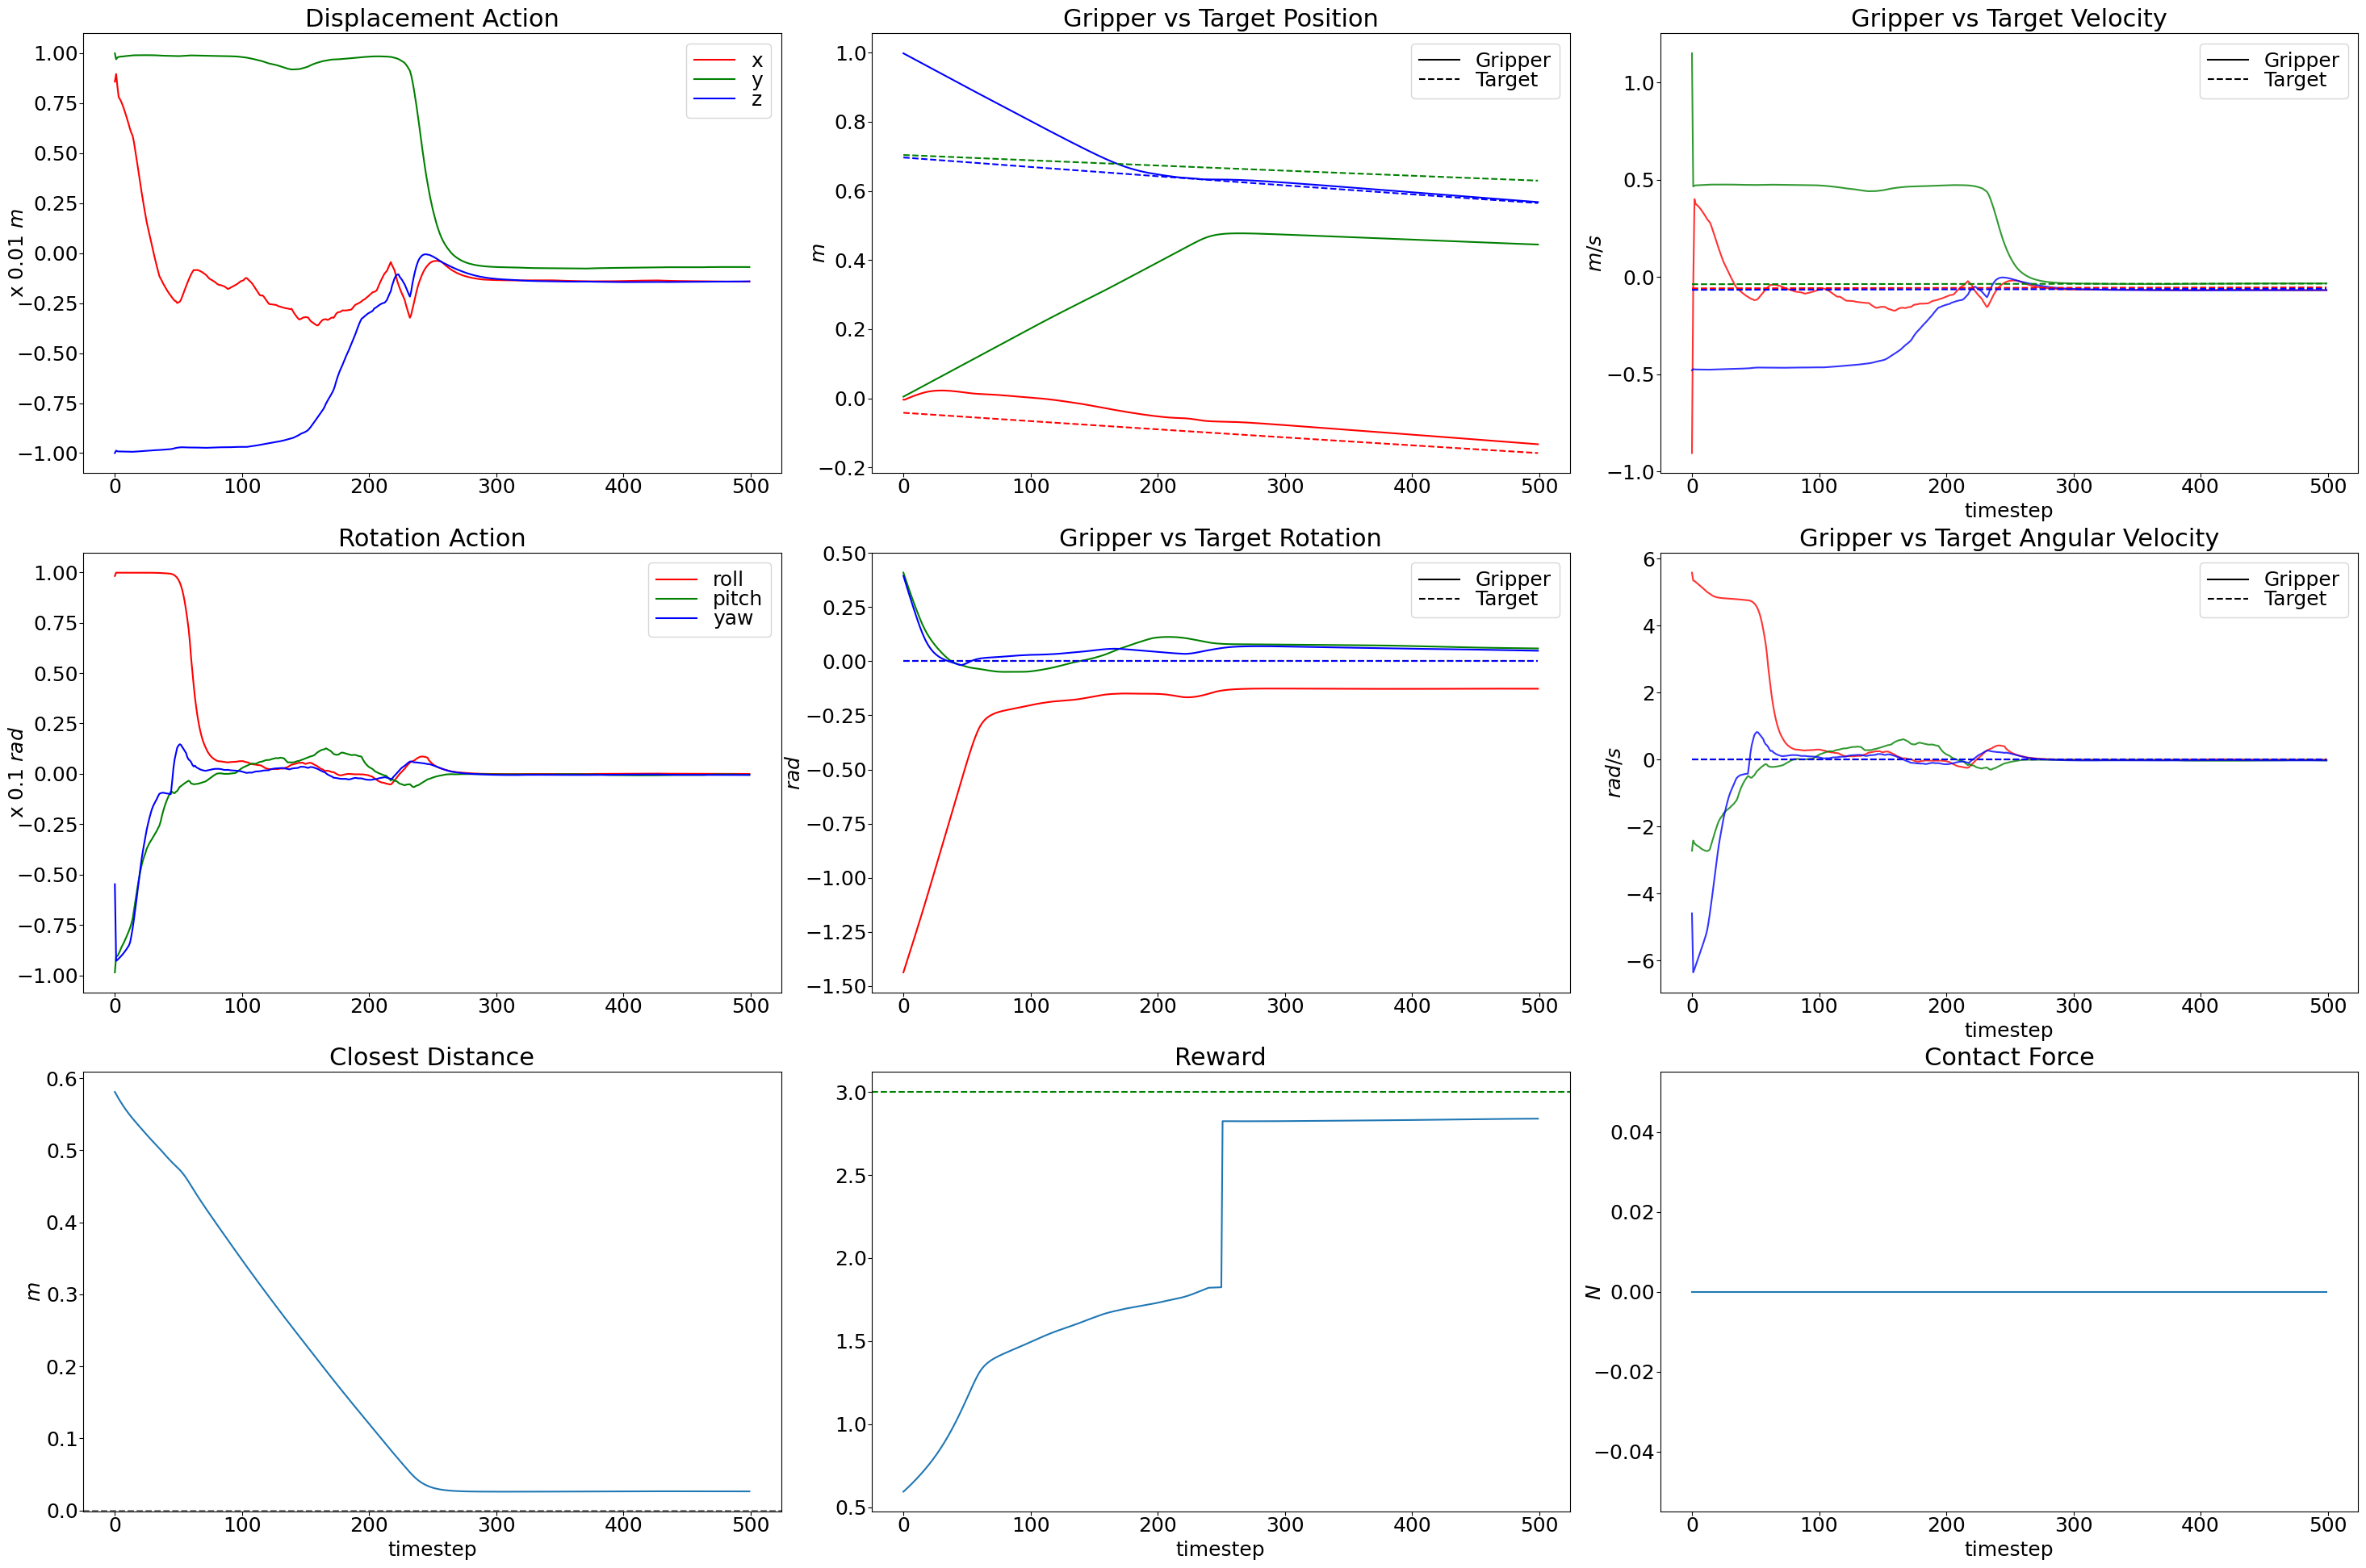

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Read data
data_path = 'evaluation/test1.csv'
header = pd.read_csv(data_path, nrows=0).columns.tolist()
db = pd.read_csv(data_path,header=0)
# delete the last row
db = db[:-1]
db.columns = header

# Setting up the figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))
fig.tight_layout(pad=5.0)  # To ensure plots don't overlap with each other
font_size = 18
title_size = 22
pad = 1
solid_line = plt.Line2D([0], [0], color='black', linestyle='-', label='Gripper')
dashed_line = plt.Line2D([0], [0], color='black', linestyle='--', label='Target')

# Displacement Action
axes[0, 0].plot(db["x action"], color='r')
axes[0, 0].plot(db["y action"], color='g')
axes[0, 0].plot(db["z action"], color='b')
axes[0, 0].set_title('Displacement Action', fontsize=title_size)
axes[0, 0].set_ylabel('x 0.01 $m$', fontsize=font_size, labelpad=-10)
# axes[0, 0].set_xlabel('timestep', fontsize=font_size)
axes[0, 0].legend(['x', 'y', 'z'], fontsize=font_size, labelspacing=0.00001)
axes[0, 0].tick_params(labelsize=font_size, pad=pad)

# Rotation Action
axes[1, 0].plot(db["roll action"], color='r')
axes[1, 0].plot(db["pitch action"], color='g')
axes[1, 0].plot(db["yaw action"], color='b')
axes[1, 0].set_title('Rotation Action', fontsize=title_size)
axes[1, 0].set_ylabel('x 0.1 $rad$', fontsize=font_size, labelpad=-10)
# axes[1, 0].set_xlabel('timestep', fontsize=font_size)
axes[1, 0].legend(['roll', 'pitch', 'yaw'], fontsize=font_size, labelspacing=0.00001)
axes[1, 0].tick_params(labelsize=font_size, pad=pad)

# Gripper vs Target Position
axes[0, 1].plot(db["x gripper"], color='r')
axes[0, 1].plot(db["y gripper"], color='g')
axes[0, 1].plot(db["z gripper"], color='b')
axes[0, 1].plot(db["x target"], linestyle='--', color='r')
axes[0, 1].plot(db["y target"], linestyle='--', color='g')
axes[0, 1].plot(db["z target"], linestyle='--', color='b')
axes[0, 1].set_title('Gripper vs Target Position', fontsize=title_size)
axes[0, 1].set_ylabel('$m$', fontsize=font_size, labelpad=-10)
axes[0, 1].legend(handles=[solid_line, dashed_line], fontsize=font_size, labelspacing=0.00001)
axes[0, 1].tick_params(labelsize=font_size, pad=pad)
# axes[0, 2].legend(['x gripper', 'y gripper', 'z gripper', 'x target', 'y target', 'z target'])

# Gripper vs Target Rotation
axes[1, 1].plot(db["roll gripper"], color='r')
axes[1, 1].plot(db["pitch gripper"], color='g')
axes[1, 1].plot(db["yaw gripper"], color='b')
axes[1, 1].plot(db["roll target"], linestyle='--', color='r')
axes[1, 1].plot(db["pitch target"], linestyle='--', color='g')
axes[1, 1].plot(db["yaw target"], linestyle='--', color='b')
axes[1, 1].set_title('Gripper vs Target Rotation', fontsize=title_size)
axes[1, 1].set_ylabel('$rad$', fontsize=font_size, labelpad=pad)
axes[1, 1].legend(handles=[solid_line, dashed_line], fontsize=font_size, labelspacing=0.00001)
axes[1, 1].tick_params(labelsize=font_size, pad=pad)
# axes[0, 3].legend(['roll gripper', 'pitch gripper', 'yaw gripper', 'roll target', 'pitch target', 'yaw target'])

# Gripper vs Target Velocity
axes[0, 2].plot(db["x velocity gripper"], color='r', alpha=0.8)
axes[0, 2].plot(db["y velocity gripper"], color='g', alpha=0.8)
axes[0, 2].plot(db["z velocity gripper"], color='b', alpha=0.8)
axes[0, 2].plot(db["x velocity target"], linestyle='--', color='r')
axes[0, 2].plot(db["y velocity target"], linestyle='--', color='g')
axes[0, 2].plot(db["z velocity target"], linestyle='--', color='b')
axes[0, 2].set_title('Gripper vs Target Velocity', fontsize=title_size)
axes[0, 2].set_ylabel('$m/s$', fontsize=font_size, labelpad=pad)
axes[0, 2].set_xlabel('timestep', fontsize=font_size)
axes[0, 2].legend(handles=[solid_line, dashed_line], fontsize=font_size, labelspacing=0.00001)
axes[0, 2].tick_params(labelsize=font_size, pad=pad)
# axes[1, 0].legend([r'$\dot{x}$ gripper', r'$\dot{y}$ gripper', r'$\dot{z}$ gripper', 
#                    r'$\dot{x}$ target', r'$\dot{y}$ target', r'$\dot{z}$ target'])

# Gripper vs Target angular Velocity
axes[1, 2].plot(db["x angular velocity gripper"], color='r', alpha=0.8)
axes[1, 2].plot(db["y angular velocity gripper"], color='g', alpha=0.8)
axes[1, 2].plot(db["z angular velocity gripper"], color='b', alpha=0.8)
axes[1, 2].plot(db["x angular velocity target"], linestyle='--', color='r')
axes[1, 2].plot(db["y angular velocity target"], linestyle='--', color='g')
axes[1, 2].plot(db["z angular velocity target"], linestyle='--', color='b')
axes[1, 2].set_title('Gripper vs Target Angular Velocity', fontsize=title_size)
axes[1, 2].set_ylabel('$rad/s$', fontsize=font_size, labelpad=pad)
axes[1, 2].set_xlabel('timestep', fontsize=font_size)
axes[1, 2].legend(handles=[solid_line, dashed_line], fontsize=font_size, labelspacing=0.00001)
axes[1, 2].tick_params(labelsize=font_size, pad=pad)

# Closest Distance
axes[2, 0].plot(db["closest distance"])
axes[2, 0].set_title('Closest Distance', fontsize=title_size)
axes[2, 0].set_ylabel('$m$', fontsize=font_size, labelpad=pad)
axes[2, 0].set_xlabel('timestep', fontsize=font_size)
axes[2, 0].tick_params(labelsize=font_size, pad=pad)
axes[2, 0].axhline(y=0, color='gray', linestyle='--')  # `color` and `linewidth` are optional


# Reward
axes[2, 1].plot(db["rewards"])
axes[2, 1].set_title('Reward', fontsize=title_size)
# axes[1, 2].set_ylabel('x 10mm', fontsize=font_size)
axes[2, 1].set_xlabel('timestep', fontsize=font_size)
axes[2, 1].tick_params(labelsize=font_size, pad=pad)
axes[2, 1].axhline(y=3, color='g', linestyle='--')  # `color` and `linewidth` are optional

# Contact Force
axes[2, 2].plot(db["contact force"])
axes[2, 2].set_title('Contact Force', fontsize=title_size)
axes[2, 2].set_ylabel('$N$', fontsize=font_size, labelpad=-10)
axes[2, 2].set_xlabel('timestep', fontsize=font_size)
axes[2, 2].tick_params(labelsize=font_size, pad=pad)


